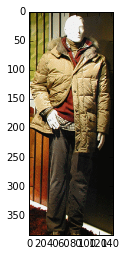

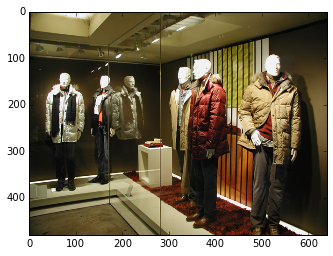

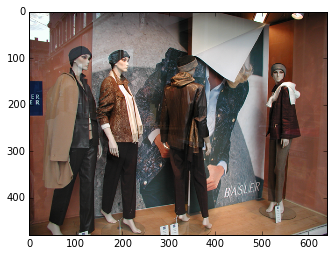

In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

def imread(url):
    return cv2.cvtColor(cv2.imread(url), cv2.COLOR_BGR2RGB)

person = imread('person.png')
people = imread('people.png')
people2 = imread('people2.png')

person2 = cv2.imread('person.png')

plt.figure()
plt.imshow(person)
plt.figure()
plt.imshow(people)
plt.figure()
plt.imshow(people2)

## Sobel filter edge detection

(-0.5, 143.5, 383.5, -0.5)

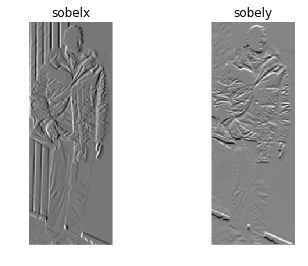

In [147]:
# Sobel
import scipy.ndimage.filters as filters

gray_person = cv2.cvtColor(person, cv2.COLOR_RGB2GRAY)
gray_person_bl = cv2.GaussianBlur(gray_person, (3, 3), 0)

# convolute
sobelx = cv2.Sobel(gray_person_bl, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray_person_bl, cv2.CV_64F, 0, 1, ksize=3)

#plt.imshow(gray_person, cmap=plt.get_cmap('gray'))
fig1, (ax1, ax2) = plt.subplots(
    ncols=2, 
    sharex=True, 
    sharey=True, 
    subplot_kw={'adjustable':'box-forced'})

ax1.imshow(sobelx, cmap=plt.get_cmap('gray'), interpolation='none')
ax1.set_title('sobelx')
ax1.axis('off')

ax2.imshow(sobely, cmap=plt.get_cmap('gray'), interpolation='none')
ax2.set_title('sobely')
ax2.axis('off')

## actually apply sobel

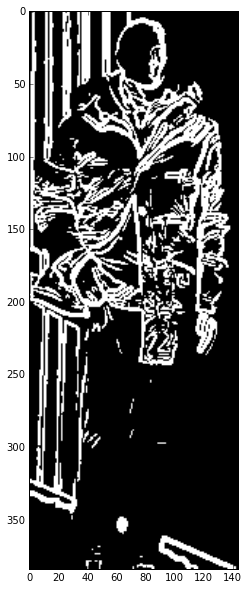

In [118]:
sobelx2 = np.multiply(sobelx, sobelx)
sobely2 = np.multiply(sobely, sobely)

Sob = np.sqrt(np.add(sobelx2, sobely2))

Sob = np.greater(Sob, 140).astype(int)

plt.figure(figsize=(10, 10))
plt.imshow(Sob, cmap=plt.get_cmap('gray'))

## start with HOGs

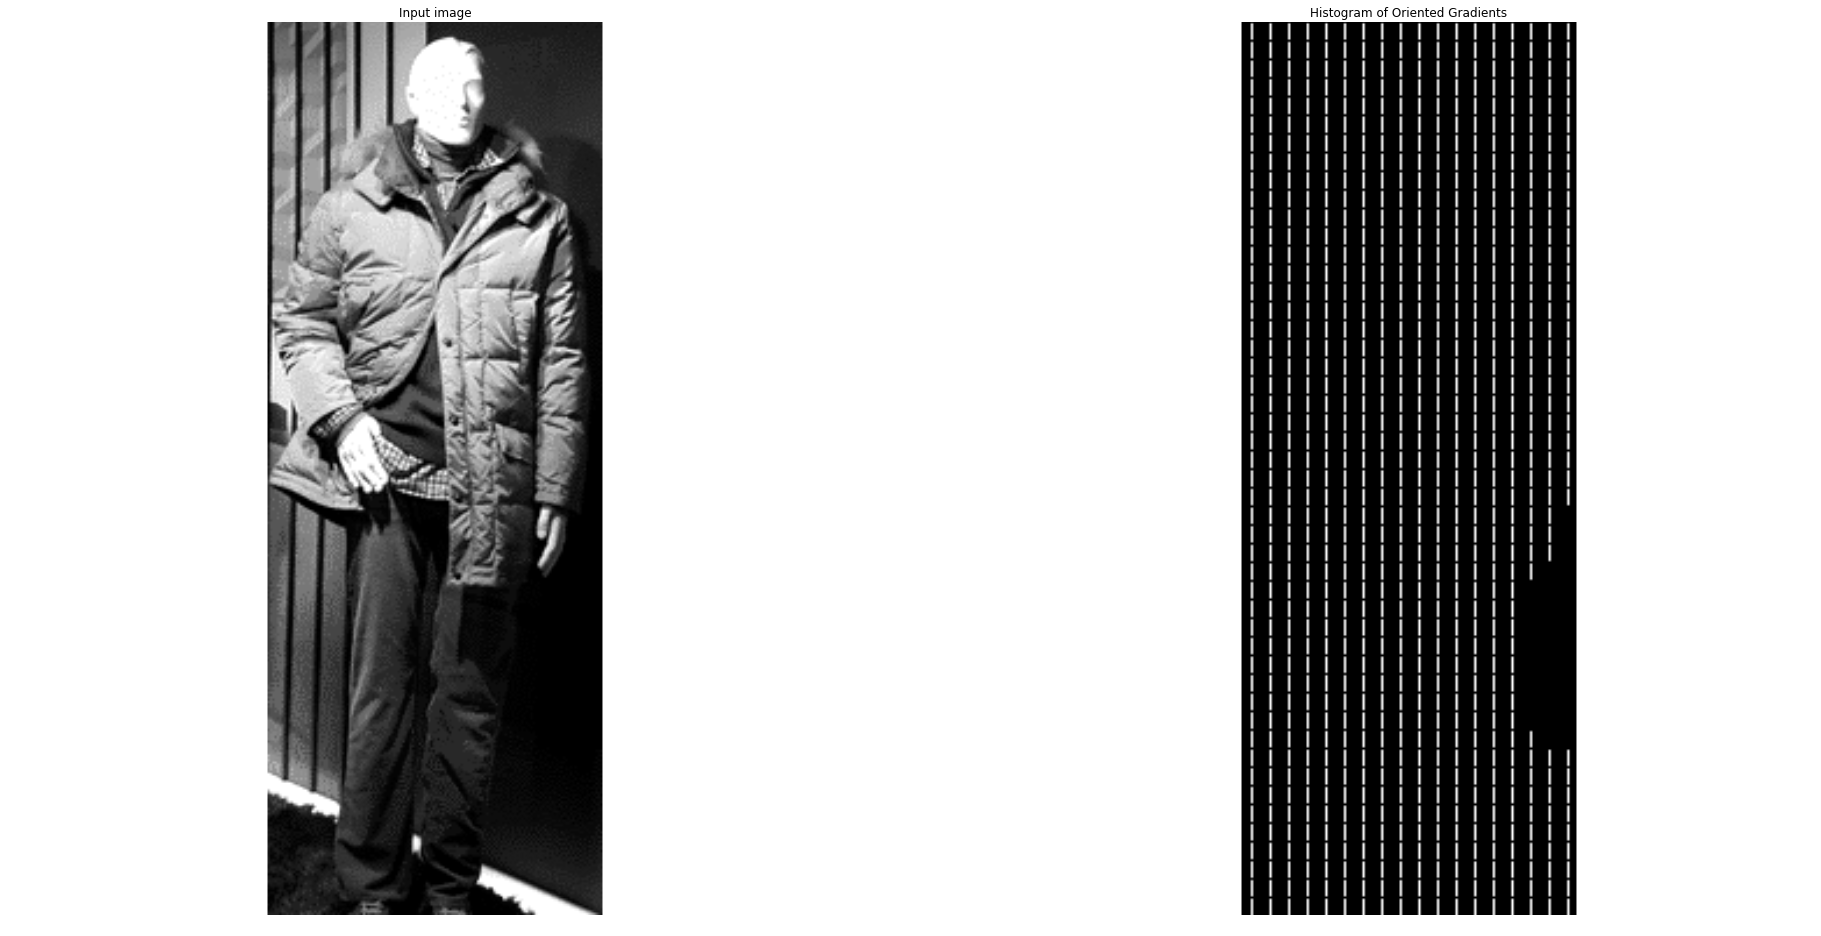

In [159]:
from skimage.feature import hog
from skimage import data, color, exposure

image = gray_person.copy()

fd, hog_image = hog(
    image,
    orientations=1,
    pixels_per_cell=(8, 8),
    cells_per_block=(8, 8), visualise=True)

fig, (ax1, ax2) = plt.subplots(
    1,
    2,
    figsize=(32, 16),
    sharex=True,
    sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax1.set_adjustable('box-forced')
plt.show()